In [1]:
lfs=require 'lfs'
if string.find(lfs.currentdir(), 'visualization') then
    lfs.chdir('../')
end

In [5]:
require 'utils.MnistManager'
require 'utils.grid'
require 'models.Vae'
require 'optim'
require 'cunn'
require 'image'
Plot = require 'itorch.Plot'

In [3]:
N = 50
data = MnistManager(50):cuda()
saved = torch.load('save/Vae_z10.t7')
vae = saved.vae

# Image Reconstruction

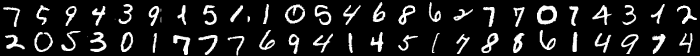

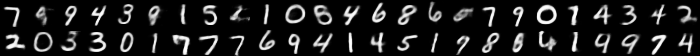

In [6]:
data:shuffle()
input = data:next()[1]
mulv, recon = unpack(vae.model:forward(input))
-- original image
itorch.image(grid.stack(input:reshape(N, 28, 28), 2, 25))
-- reconstructed image
itorch.image(grid.stack(recon:reshape(N, 28, 28), 2, 25))

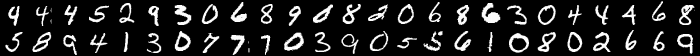

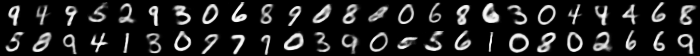

In [7]:
data:shuffleValid()
input = data:nextValid()[1]
mulv, recon = unpack(vae.model:forward(input))
-- original image
itorch.image(grid.stack(input:reshape(N, 28, 28), 2, 25))
-- reconstructed image
itorch.image(grid.stack(recon:reshape(N, 28, 28), 2, 25))

# Encoding Distribution

In [21]:
data:shuffle(1000)
input = data:next()[1]
mulv, recon = unpack(vae.model:forward(input))
--     plt = Plot()
--     plt:circle(mu[{{},1}], mu[{{},2}], '#00F0F0')
--     plt:title("Distribution")
--     plt:draw()

In [23]:
plt = Plot()
mu = mulv[{{},1}]:clone():double()
plt:histogram(mu)
plt:title("hist")
plt:draw()

# Image Generation

In [14]:
require 'utils.grid'

true	


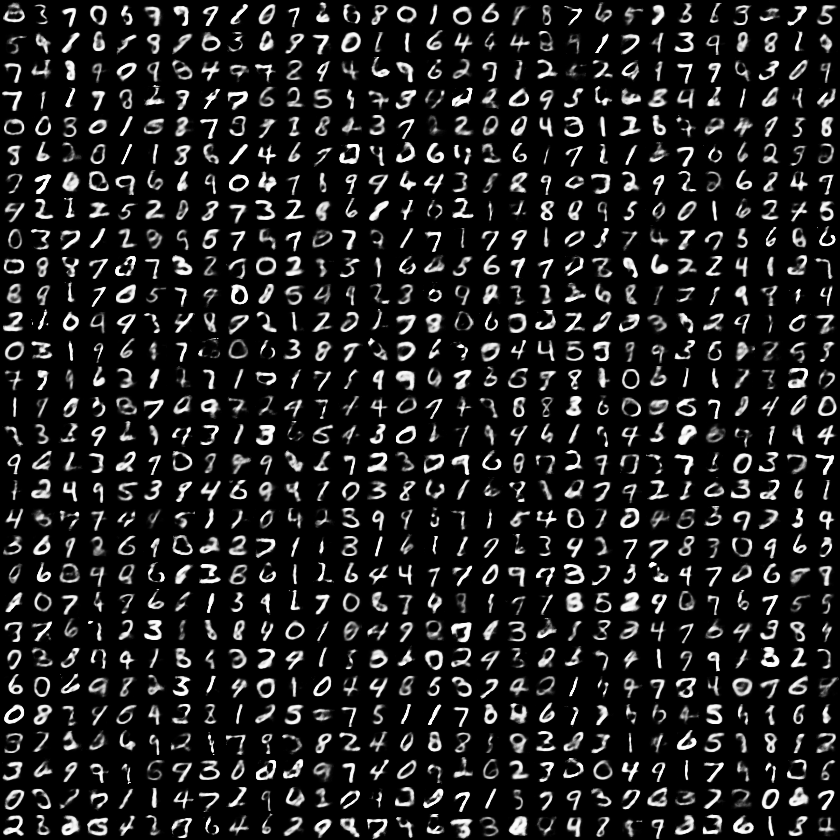

In [9]:
N = 900
z = torch.randn(N, 10):cuda()
recon = vae.decoder:forward(z)
recon = recon:reshape(N, 28, 28)
images = grid.stack(recon, 30, 30)
itorch.image(images)